<a href="https://colab.research.google.com/github/Francisco-Italo/ml2023-Italo-Moraes/blob/master/Atividades/01-Pre-processamento_Limpeza_Analise_de_Dados/01_Ferramentas_Python_para_manipula%C3%A7%C3%A3o_e_visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 - Ferramentas Python para manipulação e visualização de dados: `Numpy`, `Matplotlib` e `Pandas`

## Numpy
O `NumPy` é uma poderosa biblioteca Python que é usada principalmente para realizar cálculos em **Arrays Multidimensionais**.

Iniciaremos com a importação do `numpy`.

In [ ]:
import numpy as np

Declaração e acesso a arrays

In [ ]:
# Criação de arrays com o numpy
lista1 = [1, 2, 3]
array1 = np.array(lista1)

print(lista1)
print(array1)

# Mostra quais as dimensões do array
print('Dimensão:', array1.shape)

print(type(lista1))
print(type(array1))

[1, 2, 3]
[1 2 3]
Dimensão: (3,)
<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
lista2 = [[1, 2, 3], 
          [3, 4, 5]]
array2 = np.array(lista2)

print(array2)

# Acesso de uma linha do array multidimensional(matriz)
print('Linha 1: {}'.format(array2[0]))

# Calcula a média aritmética de uma linha
print('Média de uma linha: {}'.format(np.average(array2)))

[[1 2 3]
 [3 4 5]]
Linha 1: [1 2 3]
Média de uma linha: 3.0


Operações aritméticas com arrays

In [ ]:
# Saída: [[2,4,6],[4,6,8]]
# Observação: Como array1 é unidimensional, ele foi duplicado para combinar com o array2
print(array1 + array2)

# Saída: [[1,4,9],[3,8,15]]
print(array1 * array2)

[[2 4 6]
 [4 6 8]]
[[ 1  4  9]
 [ 3  8 15]]


Inicialização de arrays e verificação de tipagem de dados

In [ ]:
# Inicializa uma matriz 3x5 com zeros
a = np.zeros((3, 5))
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
# Por padrão, os valores de um array feito no numpy é float
type(a[0, 0])

numpy.float64

In [ ]:
# Inicializa array com uma dimensão e valores inteiros
b = np.zeros((5,), dtype=int)
print(b)

type(b[0])

[0 0 0 0 0]


numpy.int64

In [ ]:
# Retorna um novo array com uma determinada dimensão, valores e tipo
print(np.full(5, 2, dtype=float))

# Cria um array de determinada dimensão sem inicializá-lo
print(np.empty([3, 4]))

[2. 2. 2. 2. 2.]
[[2.2683107e-316 0.0000000e+000 0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000]]


In [ ]:
# Inicializa um array nxm com valores aleatórios
c = np.random.rand(3, 4)
print(c)

# Faz a transposta de um array
np.transpose(c)

[[0.39125966 0.46481858 0.54244106 0.34440406]
 [0.11998836 0.41097183 0.18678846 0.05082046]
 [0.72157002 0.80618525 0.79187076 0.04314119]]


array([[0.39125966, 0.11998836, 0.72157002],
       [0.46481858, 0.41097183, 0.80618525],
       [0.54244106, 0.18678846, 0.79187076],
       [0.34440406, 0.05082046, 0.04314119]])

Formas avançadas de acesso a dados de arrays

In [ ]:
d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(d)

# Impressões

# Coluna 0
print(d[:, 0])

# Coluna 1
print(d[:, 1])

# Colunas 0 a 1
print(d[:, 0:2])

# Coluna 2
print(d[:, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 4 7]
[2 5 8]
[[1 2]
 [4 5]
 [7 8]]
[3 6 9]


In [ ]:
# Criação de novos arrays baseados nos pedaços do array d
x = d[:, 0:2]
y = d[:, 2]

print(x)
print(x.shape)
print('')
print(y)
print(y.shape)

[[1 2]
 [4 5]
 [7 8]]
(3, 2)

[3 6 9]
(3,)


In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Redimensiona o array para ter os valores das posições 1 a 6, pulando um numero
x[1:7:2]

array([1, 3, 5])

Salvamento e carregamento dos dados

In [ ]:
# Salva o array em um arquivo
np.save('/tmp/x.npy', x)
del(x)

# Carrega em outro array
y = np.load('/tmp/x.npy')
print(y)
print(type(y))

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>


In [ ]:
# Usar memory mapping quando o conteúdo não couber em memória RAM
# Ele acessa pedaços do arquivo e coloca-os em objetos array-like
x_mm = np.memmap('/tmp/x_mm.npy', dtype='float32', mode='w+', shape=(1000, 100))
x_mm[999][99] = 12.5
print(x_mm[999][99])

# É necessário deletar x_mm, pois após a deleção é que as mudanças são atualizadas no ar  uivo em disco
# Ele é apenas uma instância, um buffer do dado de um arquivo 
del(x_mm)

# Carregamento
new_x_mm = np.memmap('/tmp/x_mm.npy', dtype='float32', mode='r', shape=(1000, 100))
print(new_x_mm[999][99])

del(new_x_mm)

12.5
12.5


Exemplo prático: IMC de jogadores de _baseball_

In [ ]:
# Criação de lista simples com 8 alturas de jogadores de baseball
baseball = [180, 215, 210, 210, 188, 176, 209, 200],

In [ ]:
# Criação de um array numpy da variável baseball: np_baseball
# Com um array numpy, as funções oferecidas pelo pacote podem ser aplicadas ao array
np_baseball = np.array(baseball)

In [ ]:
# Imprima o tipo da variável np_baseball
print(type(np_baseball))

<class 'numpy.ndarray'>


In [ ]:
height_in = [74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 73, 75, 78, 79, 76, 74, 76, 72, 71, 75, 77, 74, 73, 74, 78, 73, 75, 73, 75, 75, 74, 69, 71, 74, 73, 73, 76, 74, 74, 70, 72, 77, 74, 70, 73, 75, 76, 76, 78, 74, 74, 76, 77, 81, 78, 75, 77, 75, 76, 74, 72, 72, 75, 73, 73, 73, 70, 70, 70, 76, 68, 71, 72, 75, 75, 75, 75, 68, 74, 78, 71, 73, 76, 74, 74, 79, 75, 73, 76, 74, 74, 73, 72, 74, 73, 74, 72, 73, 69, 72, 73, 75, 75, 73, 72, 72, 76, 74, 72, 77, 74, 77, 75, 76, 80, 74, 74, 75, 78, 73, 73, 74, 75, 76, 71, 73, 74, 76, 76, 74, 73, 74, 70, 72, 73, 73, 73, 73, 71, 74, 74, 72, 74, 71, 74, 73, 75, 75, 79, 73, 75, 76, 74, 76, 78, 74, 76, 72, 74, 76, 74, 75, 78, 75, 72, 74, 72, 74, 70, 71, 70, 75, 71, 71, 73, 72, 71, 73, 72, 75, 74, 74, 75, 73, 77, 73, 76, 75, 74, 76, 75, 73, 71, 76, 75, 72, 71, 77, 73, 74, 71, 72, 74, 75, 73, 72, 75, 75, 74, 72, 74, 71, 70, 74, 77, 77, 75, 75, 78, 75, 76, 73, 75, 75, 79, 77, 76, 71, 75, 74, 69, 71, 76, 72, 72, 70, 72, 73, 71, 72, 71, 73, 72, 73, 74, 74, 72, 75, 74, 74, 77, 75, 73, 72, 71, 74, 77, 75, 75, 75, 78, 78, 74, 76, 78, 76, 70, 72, 80, 74, 74, 71, 70, 72, 71, 74, 71, 72, 71, 74, 69, 76, 75, 75, 76, 73, 76, 73, 77, 73, 72, 72, 77, 77, 71, 74, 74, 73, 78, 75, 73, 70, 74, 72, 73, 73, 75, 75, 74, 76, 73, 74, 75, 75, 72, 73, 73, 72, 74, 78, 76, 73, 74, 75, 70, 75, 71, 72, 78, 75, 73, 73, 71, 75, 77, 72, 69, 73, 74, 72, 70, 75, 70, 72, 72, 74, 73, 74, 76, 75, 80, 72, 75, 73, 74, 74, 73, 75, 75, 71, 73, 75, 74, 74, 72, 74, 74, 74, 73, 76, 75, 72, 73, 73, 73, 72, 72, 72, 72, 71, 75, 75, 74, 73, 75, 79, 74, 76, 73, 74, 74, 72, 74, 74, 75, 78, 74, 74, 74, 77, 70, 73, 74, 73, 71, 75, 71, 72, 77, 74, 70, 77, 73, 72, 76, 71, 76, 78, 75, 73, 78, 74, 79, 75, 76, 72, 75, 75, 70, 72, 70, 74, 71, 76, 73, 76, 71, 69, 72, 72, 69, 73, 69, 73, 74, 74, 72, 71, 72, 72, 76, 76, 76, 74, 76, 75, 71, 72, 71, 73, 75, 76, 75, 71, 75, 74, 72, 73, 73, 73, 73, 76, 72, 76, 73, 73, 73, 75, 75, 77, 73, 72, 75, 70, 74, 72, 80, 71, 71, 74, 74, 73, 75, 76, 73, 77, 72, 73, 77, 76, 71, 75, 73, 74, 77, 71, 72, 73, 69, 73, 70, 74, 76, 73, 73, 75, 73, 79, 74, 73, 74, 77, 75, 74, 73, 77, 73, 77, 74, 74, 73, 77, 74, 77, 75, 77, 75, 71, 74, 70, 79, 72, 72, 70, 74, 74, 72, 73, 72, 74, 74, 76, 82, 74, 74, 70, 73, 73, 74, 77, 72, 76, 73, 73, 72, 74, 74, 71, 72, 75, 74, 74, 77, 70, 71, 73, 76, 71, 75, 74, 72, 76, 79, 76, 73, 76, 78, 75, 76, 72, 72, 73, 73, 75, 71, 76, 70, 75, 74, 75, 73, 71, 71, 72, 73, 73, 72, 69, 73, 78, 71, 73, 75, 76, 70, 74, 77, 75, 79, 72, 77, 73, 75, 75, 75, 73, 73, 76, 77, 75, 70, 71, 71, 75, 74, 69, 70, 75, 72, 75, 73, 72, 72, 72, 76, 75, 74, 69, 73, 72, 72, 75, 77, 76, 80, 77, 76, 79, 71, 75, 73, 76, 77, 73, 76, 70, 75, 73, 75, 70, 69, 71, 72, 72, 73, 70, 70, 73, 76, 75, 72, 73, 79, 71, 72, 74, 74, 74, 72, 76, 76, 72, 72, 71, 72, 72, 70, 77, 74, 72, 76, 71, 76, 71, 73, 70, 73, 73, 72, 71, 71, 71, 72, 72, 74, 74, 74, 71, 72, 75, 72, 71, 72, 72, 72, 72, 74, 74, 77, 75, 73, 75, 73, 76, 72, 77, 75, 72, 71, 71, 75, 72, 73, 73, 71, 70, 75, 71, 76, 73, 68, 71, 72, 74, 77, 72, 76, 78, 81, 72, 73, 76, 72, 72, 74, 76, 73, 76, 75, 70, 71, 74, 72, 73, 76, 76, 73, 71, 68, 71, 71, 74, 77, 69, 72, 76, 75, 76, 75, 76, 72, 74, 76, 74, 72, 75, 78, 77, 70, 72, 79, 74, 71, 68, 77, 75, 71, 72, 70, 72, 72, 73, 72, 74, 72, 72, 75, 72, 73, 74, 72, 78, 75, 72, 74, 75, 75, 76, 74, 74, 73, 74, 71, 74, 75, 76, 74, 76, 76, 73, 75, 75, 74, 68, 72, 75, 71, 70, 72, 73, 72, 75, 74, 70, 76, 71, 82, 72, 73, 74, 71, 75, 77, 72, 74, 72, 73, 78, 77, 73, 73, 73, 73, 73, 76, 75, 70, 73, 72, 73, 75, 74, 73, 73, 76, 73, 75, 70, 77, 72, 77, 74, 75, 75, 75, 75, 72, 74, 71, 76, 71, 75, 76, 83, 75, 74, 76, 72, 72, 75, 75, 72, 77, 73, 72, 70, 74, 72, 74, 72, 71, 70, 71, 76, 74, 76, 74, 74, 74, 75, 75, 71, 71, 74, 77, 71, 74, 75, 77, 76, 74, 76, 72, 71, 72, 75, 73, 68, 72, 69, 73, 73, 75, 70, 70, 74, 75, 74, 74, 73, 74, 75, 77, 73, 74, 76, 74, 75, 73, 76, 78, 75, 73, 77, 74, 72, 74, 72, 71, 73, 75, 73, 67, 67, 76, 74, 73, 70, 75, 70, 72, 77, 79, 78, 74, 75, 75, 78, 76, 75, 69, 75, 72, 75, 73, 74, 75, 75, 73]
weight_lb = [180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 189, 185, 219, 230, 205, 230, 195, 180, 192, 225, 203, 195, 182, 188, 200, 180, 200, 200, 245, 240, 215, 185, 175, 199, 200, 215, 200, 205, 206, 186, 188, 220, 210, 195, 200, 200, 212, 224, 210, 205, 220, 195, 200, 260, 228, 270, 200, 210, 190, 220, 180, 205, 210, 220, 211, 200, 180, 190, 170, 230, 155, 185, 185, 200, 225, 225, 220, 160, 205, 235, 250, 210, 190, 160, 200, 205, 222, 195, 205, 220, 220, 170, 185, 195, 220, 230, 180, 220, 180, 180, 170, 210, 215, 200, 213, 180, 192, 235, 185, 235, 210, 222, 210, 230, 220, 180, 190, 200, 210, 194, 180, 190, 240, 200, 198, 200, 195, 210, 220, 190, 210, 225, 180, 185, 170, 185, 185, 180, 178, 175, 200, 204, 211, 190, 210, 190, 190, 185, 290, 175, 185, 200, 220, 170, 220, 190, 220, 205, 200, 250, 225, 215, 210, 215, 195, 200, 194, 220, 180, 180, 170, 195, 180, 170, 206, 205, 200, 225, 201, 225, 233, 180, 225, 180, 220, 180, 237, 215, 190, 235, 190, 180, 165, 195, 200, 190, 190, 185, 185, 205, 190, 205, 206, 220, 208, 170, 195, 210, 190, 211, 230, 170, 185, 185, 241, 225, 210, 175, 230, 200, 215, 198, 226, 278, 215, 230, 240, 184, 219, 170, 218, 190, 225, 220, 176, 190, 197, 204, 167, 180, 195, 220, 215, 185, 190, 205, 205, 200, 210, 215, 200, 205, 211, 190, 208, 200, 210, 232, 230, 210, 220, 210, 202, 212, 225, 170, 190, 200, 237, 220, 170, 193, 190, 150, 220, 200, 190, 185, 185, 200, 172, 220, 225, 190, 195, 219, 190, 197, 200, 195, 210, 177, 220, 235, 180, 195, 195, 190, 230, 190, 200, 190, 190, 200, 200, 184, 200, 180, 219, 187, 200, 220, 205, 190, 170, 160, 215, 175, 205, 200, 214, 200, 190, 180, 205, 220, 190, 215, 235, 191, 200, 181, 200, 210, 240, 185, 165, 190, 185, 175, 155, 210, 170, 175, 220, 210, 205, 200, 205, 195, 240, 150, 200, 215, 202, 200, 190, 205, 190, 160, 215, 185, 200, 190, 210, 185, 220, 190, 202, 205, 220, 175, 160, 190, 200, 229, 206, 220, 180, 195, 175, 188, 230, 190, 200, 190, 219, 235, 180, 180, 180, 200, 234, 185, 220, 223, 200, 210, 200, 210, 190, 177, 227, 180, 195, 199, 175, 185, 240, 210, 180, 194, 225, 180, 205, 193, 230, 230, 220, 200, 249, 190, 208, 245, 250, 160, 192, 220, 170, 197, 155, 190, 200, 220, 210, 228, 190, 160, 184, 180, 180, 200, 176, 160, 222, 211, 195, 200, 175, 206, 240, 185, 260, 185, 221, 205, 200, 170, 201, 205, 185, 205, 245, 220, 210, 220, 185, 175, 170, 180, 200, 210, 175, 220, 206, 180, 210, 195, 200, 200, 164, 180, 220, 195, 205, 170, 240, 210, 195, 200, 205, 192, 190, 170, 240, 200, 205, 175, 250, 220, 224, 210, 195, 180, 245, 175, 180, 215, 175, 180, 195, 230, 230, 205, 215, 195, 180, 205, 180, 190, 180, 190, 190, 220, 210, 255, 190, 230, 200, 205, 210, 225, 215, 220, 205, 200, 220, 197, 225, 187, 245, 185, 185, 175, 200, 180, 188, 225, 200, 210, 245, 213, 231, 165, 228, 210, 250, 191, 190, 200, 215, 254, 232, 180, 215, 220, 180, 200, 170, 195, 210, 200, 220, 165, 180, 200, 200, 170, 224, 220, 180, 198, 240, 239, 185, 210, 220, 200, 195, 220, 230, 170, 220, 230, 165, 205, 192, 210, 205, 200, 210, 185, 195, 202, 205, 195, 180, 200, 185, 240, 185, 220, 205, 205, 180, 201, 190, 208, 240, 180, 230, 195, 215, 190, 195, 215, 215, 220, 220, 230, 195, 190, 195, 209, 204, 170, 185, 205, 175, 210, 190, 180, 180, 160, 235, 200, 210, 180, 190, 197, 203, 205, 170, 200, 250, 200, 220, 200, 190, 170, 190, 220, 215, 206, 215, 185, 235, 188, 230, 195, 168, 190, 160, 200, 200, 189, 180, 190, 200, 220, 187, 240, 190, 180, 185, 210, 220, 219, 190, 193, 175, 180, 215, 210, 200, 190, 185, 220, 170, 195, 205, 195, 210, 190, 190, 180, 220, 190, 186, 185, 190, 180, 190, 170, 210, 240, 220, 180, 210, 210, 195, 160, 180, 205, 200, 185, 245, 190, 210, 200, 200, 222, 215, 240, 170, 220, 156, 190, 202, 221, 200, 190, 210, 190, 200, 165, 190, 185, 230, 208, 209, 175, 180, 200, 205, 200, 250, 210, 230, 244, 202, 240, 200, 215, 177, 210, 170, 215, 217, 198, 200, 220, 170, 200, 230, 231, 183, 192, 167, 190, 180, 180, 215, 160, 205, 223, 175, 170, 190, 240, 175, 230, 223, 196, 167, 195, 190, 250, 190, 190, 190, 170, 160, 150, 225, 220, 209, 210, 176, 260, 195, 190, 184, 180, 195, 195, 219, 225, 212, 202, 185, 200, 209, 200, 195, 228, 210, 190, 212, 190, 218, 220, 190, 235, 210, 200, 188, 210, 235, 188, 215, 216, 220, 180, 185, 200, 210, 220, 185, 231, 210, 195, 200, 205, 200, 190, 250, 185, 180, 170, 180, 208, 235, 215, 244, 220, 185, 230, 190, 200, 180, 190, 196, 180, 230, 224, 160, 178, 205, 185, 210, 180, 190, 200, 257, 190, 220, 165, 205, 200, 208, 185, 215, 170, 235, 210, 170, 180, 170, 190, 150, 230, 203, 260, 246, 186, 210, 198, 210, 215, 180, 200, 245, 200, 192, 192, 200, 192, 205, 190, 186, 170, 197, 219, 200, 220, 207, 225, 207, 212, 225, 170, 190, 210, 230, 210, 200, 238, 234, 222, 200, 190, 170, 220, 223, 210, 215, 196, 175, 175, 189, 205, 210, 180, 180, 197, 220, 228, 190, 204, 165, 216, 220, 208, 210, 215, 195, 200, 215, 229, 240, 207, 205, 208, 185, 190, 170, 208, 225, 190, 225, 185, 180, 165, 240, 220, 212, 163, 215, 175, 205, 210, 205, 208, 215, 180, 200, 230, 211, 230, 190, 220, 180, 205, 190, 180, 205, 190, 195]

In [ ]:
# Crie um array numpy a partir da lista height_in: np_height_in
np_height_in = np.array(height_in)
print(np_height_in.shape)

# Converção de np_height_in para metros: np_height_m
np_height_m = np_height_in*0.0254

(1015,)


In [ ]:
# Criação do numpy array com os valores convertidos de libras para quilogramas
np_weight_kg = np.array(weight_lb) * 0.453592
print(np_weight_kg.shape)

(1015,)


In [ ]:
# Calcula e imprime o IMC
bmi = np_weight_kg/np_height_m ** 2
print(bmi)

[23.11037639 27.60406069 28.48080465 ... 25.62295933 23.74810865
 25.72686361]


## Matplotlib
O `matplotlib` é uma biblioteca com recursos para a geração de gráficos 2D a partir de *arrays*. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB.

In [ ]:
import matplotlib.pyplot as plt

Básico de plotagem de gráficos

In [ ]:
y = [1, 7, 3, 5, 12]
x = [1, 2, 3, 4, 5]

# Plota os pontos (coordenada x,y) no plano cartesiano. A label 'marker' define a forma do ponto de coordenada
plt.plot(x, y, marker='o')

# Coloca grade no gráfico
plt.grid()

<Figure size 640x480 with 1 Axes>

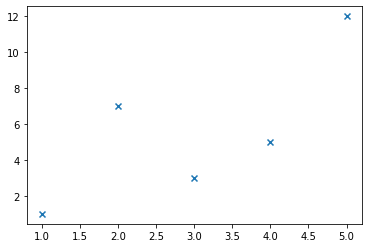

In [ ]:
# Plota o gráfico sem lgação entre os pontos
plt.scatter(x, y, marker='x');

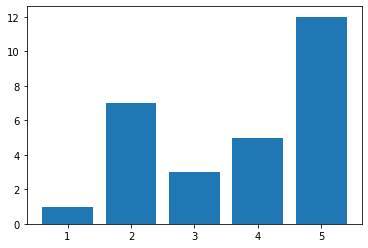

In [ ]:
plt.bar(x, y);

Gerando arquivos de imagem

In [ ]:
# Gerando gráfico em formato PDF
%config InlineBackend.figure_format = 'pdf'
plt.bar(x, y);

<Figure size 640x480 with 1 Axes>

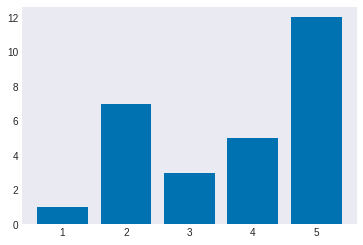

In [ ]:
# Gerando gráfico em formato PNG
%config InlineBackend.figure_format = 'png'
plt.bar(x, y);

In [ ]:
anos = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
pib = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
plt.plot(anos, pib, marker='o')

# Adiciona título na imagem e nos eixos x e y
plt.title('PIB')
plt.xlabel('Ano')
plt.ylabel(u'Bilhões de R$')

plt.grid()

<Figure size 432x288 with 1 Axes>

In [ ]:
# Versão do `matplotlib`
import matplotlib
matplotlib.__version__

'3.5.3'

Explorando estilos (paleta de cores) do Matplotlib

In [ ]:
# Estilos disponíveis do Matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# Reseta estilos, voltando ao estilo padrão
plt.rcdefaults()

In [ ]:
# Definição de um estilo
plt.style.use('seaborn-colorblind')

plt.plot(x, y, marker='o')
plt.grid()

<Figure size 640x480 with 1 Axes>

In [ ]:
plt.rcdefaults()
plt.style.use('seaborn-dark')

In [ ]:
plt.plot(x, y, marker='o')
plt.grid()

<Figure size 640x480 with 1 Axes>

## Pandas
Fornece estruturas de dados e funcionalidades para manipular e analisar dados de forma eficiente.

Principais estruturas de dados:
- Series - array unidimensional cujas linhas e colunas podem receber rótulos (labels).
- DataFrame - array multidimensional cujas linhas e colunas podem receber rótulos (labels).

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

### Series

Inicialização e acesso

In [ ]:
# Definição de uma series. Perceba que o array será posto como uma coluna e ao seu lado haverá seus índices
s1 = pd.Series([2, 7, 5, 1, 4])
print(s1)

0    2
1    7
2    5
3    1
4    4
dtype: int64


In [ ]:
# Renomeação dos rótulos. Por padrão, os rótulos são os índices do array
lista = [2, 7, 5, 1, 4]
rotulos = ['a', 'b', 'c', 'd', 'e']
s2 = pd.Series(lista, index=rotulos)
print(s2)

a    2
b    7
c    5
d    1
e    4
dtype: int64


In [ ]:
# Pode-se usar o rótulo para acessar um valor do array
print(s1[2])
print(s2['c'])

5
5


Plotagem

In [ ]:
s1.plot(marker='o', grid=True);

<Figure size 432x288 with 1 Axes>

### DataFrames

Manipulação do dataframe

In [ ]:
# Criação de uma tabela com nomes das linhas e colunas e a matriz de dados
matriz = np.array([[1, 2, 3], [4, 5, 6]])
nomes_linhas = ['L1', 'L2']
nomes_cols = ['C1', 'C2', 'C3']

df = pd.DataFrame(matriz, index=nomes_linhas, columns=nomes_cols)

In [ ]:
# Imprime tabela com a opção de tabela interativa
df

,C1,C2,C3
L1,1,2,3
L2,4,5,6


In [ ]:
# Imprime tabela
print(df)

    C1  C2  C3
L1   1   2   3
L2   4   5   6


In [ ]:
#transform dataframe in LaTeX code to represent it in an article
print(df.style.to_latex())

\begin{tabular}{lrrr}
 & C1 & C2 & C3 \\
L1 & 1 & 2 & 3 \\
L2 & 4 & 5 & 6 \\
\end{tabular}



In [ ]:
# Atualização de dados em coluna
df['C4'] = [4,7]

# Adição de coluna
df['L2'] = [7,5]
df

,C1,C2,C3,C4,L2
L1,1,2,3,4,7
L2,4,5,6,7,5


Plotagens

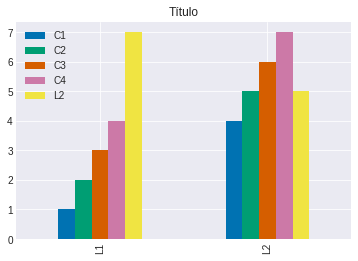

In [ ]:
# Plot do dataframe em forma de gráfico
df.plot(kind='bar', grid=True, title='Título');

In [ ]:
# Aplica a transposta de df
df2 = df.transpose()
df2

,L1,L2
C1,1,4
C2,2,5
C3,3,6
C4,4,7
L2,7,5


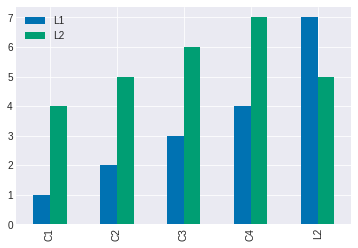

In [ ]:
df2.plot(kind='bar', grid=True);

In [ ]:
# Organiza as linhas do dataframe baseada nos valores de uma certa coluna, podendo optar por ordem crescente ou decrescente
df.sort_values(by='C4', ascending=False)

,C1,C2,C3,C4,L2
L2,4,5,6,7,5
L1,1,2,3,4,7


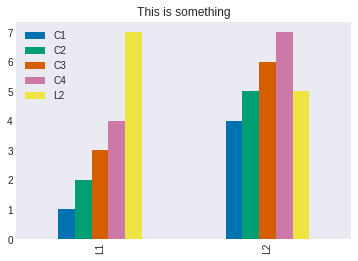

In [ ]:
df.plot(kind='bar', grid=False, title='This is something');